# Thinking like Xarray : High-level computational patterns

**Deepak Cherian, CGD**

March 9, 2022

-----

## Motivation / Learning goals

From https://toolz.readthedocs.io/en/latest/control.html
> The Toolz library contains dozens of patterns like map and groupby. Learning a core set (maybe a dozen) covers the vast majority of common programming tasks often done by hand.
> A rich vocabulary of core control functions conveys the following benefits:
>    - You identify new patterns
>    - You make fewer errors in rote coding
>    - You can depend on well tested and benchmarked implementations


The same is true for xarray

## Xarray's high-level patterns


Xarray allows you to leverage dataset metadata to write more readable analysis code. The metadata is stored with the data; not in your head.
1. Dimension names: `dim="latitude"` instead of `axis=0`
2. Coordinate "labels": or axis tick labels. `data.sel(latitude=45)` instead of `data[10]`


Xarray also provides high-level computational patterns that cover many data analysis tasks.

1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `groupby_bins`: GroupBy after discretizing a numeric variable.
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `weighted` :
   [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


## Load example dataset

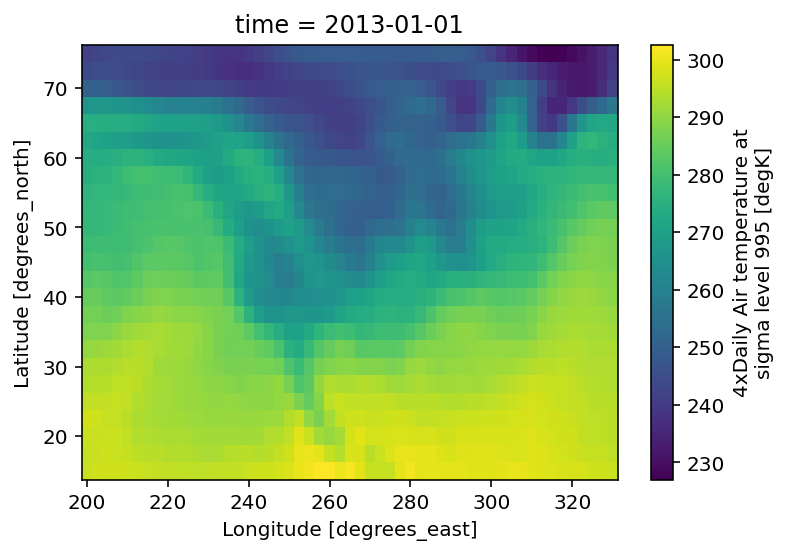

In [1]:
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)

da = xr.tutorial.load_dataset("air_temperature", engine="netcdf4").air
monthly = da.resample(time="M").mean()
data = da.isel(time=0)
data.plot()

-----

## Concept: "index space" vs "label space"


These are windowed operations with a window of a fixed size.

- ``rolling``: sliding window operations e.g. running mean
- ``coarsen``: decimating; reshaping

In [2]:
data

<xarray.DataArray 'air' (lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 298.0 297.8 297.6 296.9 296.8 296.6
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [3]:
# index space
data[10, :]  # 10th element along the first axis; ¯\_(ツ)_/¯

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [4]:
# slightly better index space
data.isel(lat=10)  # slightly better, 10th element in latitude

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [5]:
# "label" space
data.sel(lat=50)  # much better! lat=50°N

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [6]:
# What I wanted to do
data.sel(lat=50)

# What I had to do (if I wasn't using xarray)
data[10, :]

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

-----

## Xarray provides high-level patterns in both "index space" and  "label space"

#### Index space
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
   
#### Label space
1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `groupby_bins`: GroupBy after discretizing a numeric variable.
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)

----- 

## Index space: windows of fixed width


### Sliding windows of fixed length: ``rolling``

- returns object of same shape as input
- pads with NaNs to make this happen
- supports multiple dimensions

Here's the dataset

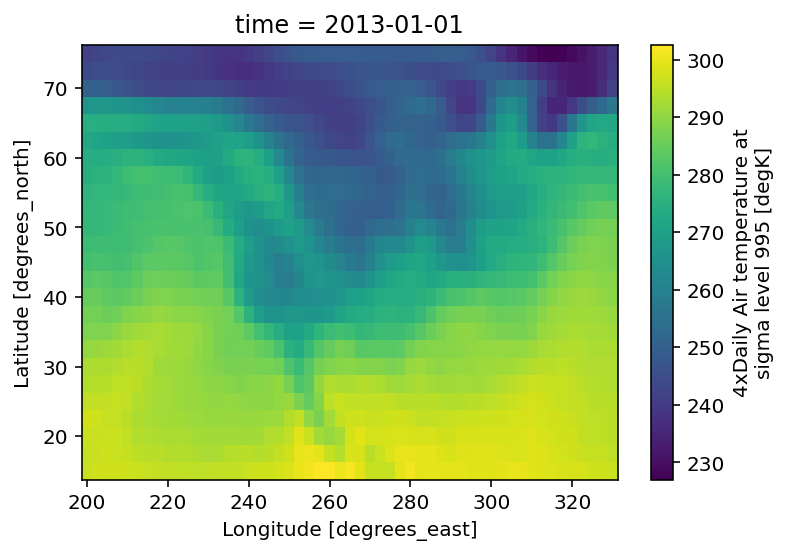

In [7]:
data.plot()

And now smoothed 5 point running mean in lat and lon

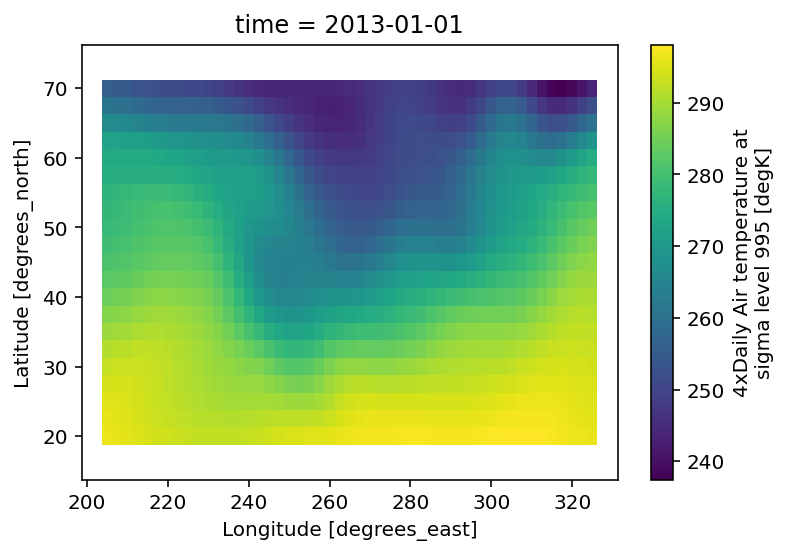

In [8]:
data.rolling(lat=5, lon=5, center=True).mean().plot()

#### Apply an existing numpy-only function with ``reduce``

Tip: The `reduce` method expects a function that can receive and return plain arrays (e.g. numpy).  The `map` method expects a function that can receive and return Xarray objects.

Here's an example function: `np.mean`

**Exercise** Calculate the rolling mean in 5 point bins along both latitude and longitude using [`rolling(...).reduce`](https://docs.xarray.dev/en/stable/generated/xarray.core.rolling.DataArrayRolling.reduce.html)

Answer:

In [ ]:
# exactly equivalent to data.rolling(...).mean()
data.rolling(lat=5, lon=5, center=True).reduce(np.mean).plot()

#### For more complicated analysis, construct a new array with a new dimension.
Allows things like short-time fourier transform, spectrogram, windowed rolling etc.

In [10]:
simple = xr.DataArray(np.arange(10), dims="time", coords={"time": np.arange(10)})
simple

<xarray.DataArray (time: 10)>
0 1 2 3 4 5 6 7 8 9
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

In [11]:
# adds a new dimension "window"
simple.rolling(time=5, center=True).construct("window")

<xarray.DataArray (time: 10, window: 5)>
nan nan 0.0 1.0 2.0 nan 0.0 1.0 2.0 3.0 ... 7.0 8.0 9.0 nan 7.0 8.0 9.0 nan nan
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: window

**Exercise** Calculate the 5 point running mean in time using `rolling.construct`

Answer

In [ ]:
(
    simple
    .rolling(time=5, center=True)
    .construct("window")
    .mean("window")
)

``construct`` is clever. 
1. It constructs a **view** of the original array, so it is memory-efficient. but you didn't have to know that.
1. It does something sensible for dask arrays (though generally you want big chunksizes for the dimension you're sliding along).
1. It also works with rolling along multiple dimensions!

#### Advanced: Another ``construct`` example

This is a 2D rolling example; we need to provide two new dimension names

In [13]:
(
    data
    .rolling(lat=5, lon=5, center=True)
    .construct(lat="lat_roll", lon="lon_roll")
)

<xarray.DataArray 'air' (lat: 25, lon: 53, lat_roll: 5, lon_roll: 5)>
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Dimensions without coordinates: lat_roll, lon_roll
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

-----

### Block windows of fixed length: ``coarsen``

For non-overlapping windows or "blocks" use ``coarsen``. The syntax is very similar to `rolling`. You will need to specify ``boundary`` if the length of the dimension is not a multiple of the block size

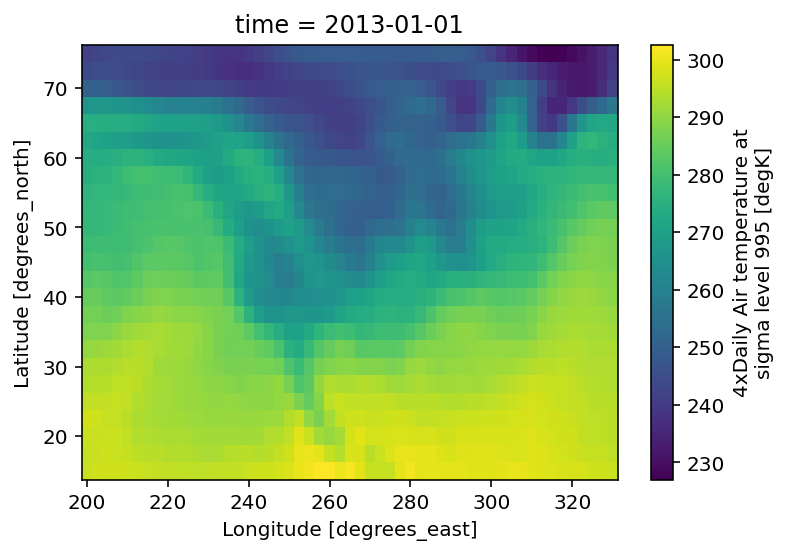

In [14]:
data.plot()

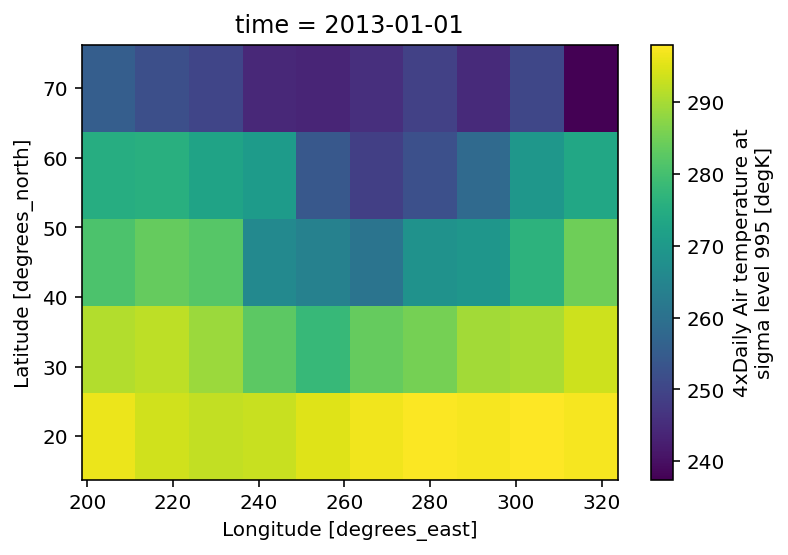

In [15]:
(
    data
    .coarsen(lat=5, lon=5, boundary="trim")
    .mean()
    .plot()
)

#### coarsen supports ``reduce`` for custom reductions

**Exercise** Use ``coarsen.reduce`` to apply `np.mean` in 5x5 (latxlon) point blocks of `data`

Answer

In [ ]:
(
    data.coarsen(lat=5, lon=5, boundary="trim")
    .reduce(np.mean)
    .plot()
)

#### coarsen supports ``construct`` for block reshaping

This is usually a good alternative to `np.reshape`

A simple example splits a 2-year long monthly 1D time series into a 2D array shaped (year x month)

In [17]:
months = xr.DataArray(np.tile(np.arange(1, 13), reps=2), dims="time", coords={"time": np.arange(1,25)})
months

<xarray.DataArray (time: 24)>
1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24

In [18]:
# break "time" into two new dimensions: "year", "month"
months.coarsen(time=12).construct(time=("year", "month"))

<xarray.DataArray (year: 2, month: 12)>
1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12
Coordinates:
    time     (year, month) int64 1 2 3 4 5 6 7 8 9 ... 17 18 19 20 21 22 23 24
Dimensions without coordinates: year, month

Note two things:
1. The `time` dimension was also reshaped.
1. The new dimensions `year` and `month` don't have any coordinate labels associated with them.

**Exercise** Reshape the `time` dimension of the DataArray `monthly` to year x month and visualize the seasonal cycle for two years at 250°E

Answer

In [ ]:
# splits time dimension into year x month
year_month = monthly.coarsen(time=12).construct(time=("year", "month"))

# assign a nice coordinate value for year
year_month["year"] = np.unique(monthly.time.dt.year)

# seasonal cycle for two years
year_month.sel(lon=250).plot.contourf(col="year", x="month", y="lat")

### Index space summary

Use `rolling` and `coarsen` for fixed size windowing operations.
1. `rolling` for overlapping windows
1. `coarsen` for non-overlapping windows.

Both provide the usual reductions as methods (`.mean()` and friends), and also `reduce` and `construct` for custom operations.

-----

## Label space "windows" or bins : GroupBy

Generalization of ``coarsen``: sometimes the windows you want are not regular.

- ``groupby``: e.g. climatologies, composites; works when "groups" are exact: e.g. characters or integers; not floats
- ``groupby_bins``: binning operations e.g. histograms
- ``resample``: groupby but specialized for time grouping (so far)

**tip** Both `groupby_bins` and `resample` are implemented as `GroupBy` with a specific way of constructing group labels.


### Deconstructing GroupBy


Commonly called "split-apply-combine". 

1. "split" : break dataset into groups
1. "apply" : apply an operation, usually a reduction like `mean`
1. "combine" : concatenate results from apply step along new "group" dimension

But really there is a first step: "identifying groups" also called "factorization" (or "binning"). Usually this is the hard part.

So "identify groups" → "split into groups" → "apply function" → "combine results".




In [20]:
da.groupby("time.month")

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [21]:
da.groupby("time.month").mean()

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
246.3 246.4 246.2 245.8 245.2 244.6 ... 298.1 298.0 298.0 297.6 297.6 297.5
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

This is how xarray identifies "groups" for the monthly climatology computation

In [22]:
da.time.dt.month

<xarray.DataArray 'month' (time: 2920)>
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

Similarly for binning, 

In [23]:
data.groupby_bins("lat", bins=[20, 35, 40, 45, 50])

DataArrayGroupBy, grouped over 'lat_bins'
4 groups with labels (45.0,, 50.0], ..., (20.0,, 35.0].

and resampling...

In [24]:
da.resample(time="M")

DataArrayResample, grouped over '__resample_dim__'
24 groups with labels 2013-01-31, ..., 2014-12-31.

### Constructing group labels

Xarray uses `pandas.factorize` for `groupby` and `pandas.cut` for `groupby_bins`. 

If the automatic group detection doesn't work for your problem then these functions are useful for constructing "group labels" in many cases

1. [numpy.digitize](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html) (binning)
1. [numpy.searchsorted](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html) supports many other data types
1. [pandas.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) supports characters, strings etc.
1. [pandas.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for binning
1. [DataArray.isin](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.isin.html)


#### More commonly useful are ["datetime components"](https://xarray.pydata.org/en/stable/user-guide/time-series.html#datetime-components)

See a full list [here](https://xarray.pydata.org/en/stable/generated/xarray.core.accessor_dt.DatetimeAccessor.html?highlight=DatetimeAccessor)

Accessed using ``DataArray.dt.*``

In [25]:
da.time

<xarray.DataArray 'time' (time: 2920)>
2013-01-01 2013-01-01T06:00:00 ... 2014-12-31T12:00:00 2014-12-31T18:00:00
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

In [26]:
da.time.dt.day

<xarray.DataArray 'day' (time: 2920)>
1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 ... 28 28 28 29 29 29 29 30 30 30 30 31 31 31 31
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [27]:
da["time.day"]

<xarray.DataArray 'day' (time: 2920)>
1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 ... 28 28 28 29 29 29 29 30 30 30 30 31 31 31 31
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [28]:
da.time.dt.season

<xarray.DataArray 'season' (time: 2920)>
'DJF' 'DJF' 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF' 'DJF' 'DJF'
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

Use `isin` to construct custom seasons

In [38]:
month = da.time.dt.month.data
season = np.full(month.shape, "    ")
season[np.isin(month, [12, 1, 2])] = "DJF"
season[np.isin(month, [3, 4, 5])] = "MAM"
season[np.isin(month, [6, 7, 8, 9])] = "JJAS"
season[np.isin(month, [10, 11])] = "ON"
season = da.time.copy(data=season)
season

<xarray.DataArray 'time' (time: 2920)>
'DJF' 'DJF' 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF' 'DJF' 'DJF'
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

#### `floor`, `ceil` and `round` time

Basically "resampling"

In [29]:
da.time

<xarray.DataArray 'time' (time: 2920)>
2013-01-01 2013-01-01T06:00:00 ... 2014-12-31T12:00:00 2014-12-31T18:00:00
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

In [30]:
# remove roundoff error in timestamps
# floor to daily frequency
da.time.dt.floor("D")

<xarray.DataArray 'floor' (time: 2920)>
2013-01-01 2013-01-01 2013-01-01 2013-01-01 ... 2014-12-31 2014-12-31 2014-12-31
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

#### `strftime` can be extremely useful

So useful and so unintuitive that it has its own website: https://strftime.org/

This example avoids merging "Feb-29" and "Mar-01" for a daily climatology

In [31]:
da.time.dt.strftime("%b-%d")

<xarray.DataArray 'strftime' (time: 2920)>
'Jan-01' 'Jan-01' 'Jan-01' 'Jan-01' ... 'Dec-31' 'Dec-31' 'Dec-31' 'Dec-31'
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

### groupby supports `reduce` for custom reductions

This applies to `groupby_bins` and `resample`

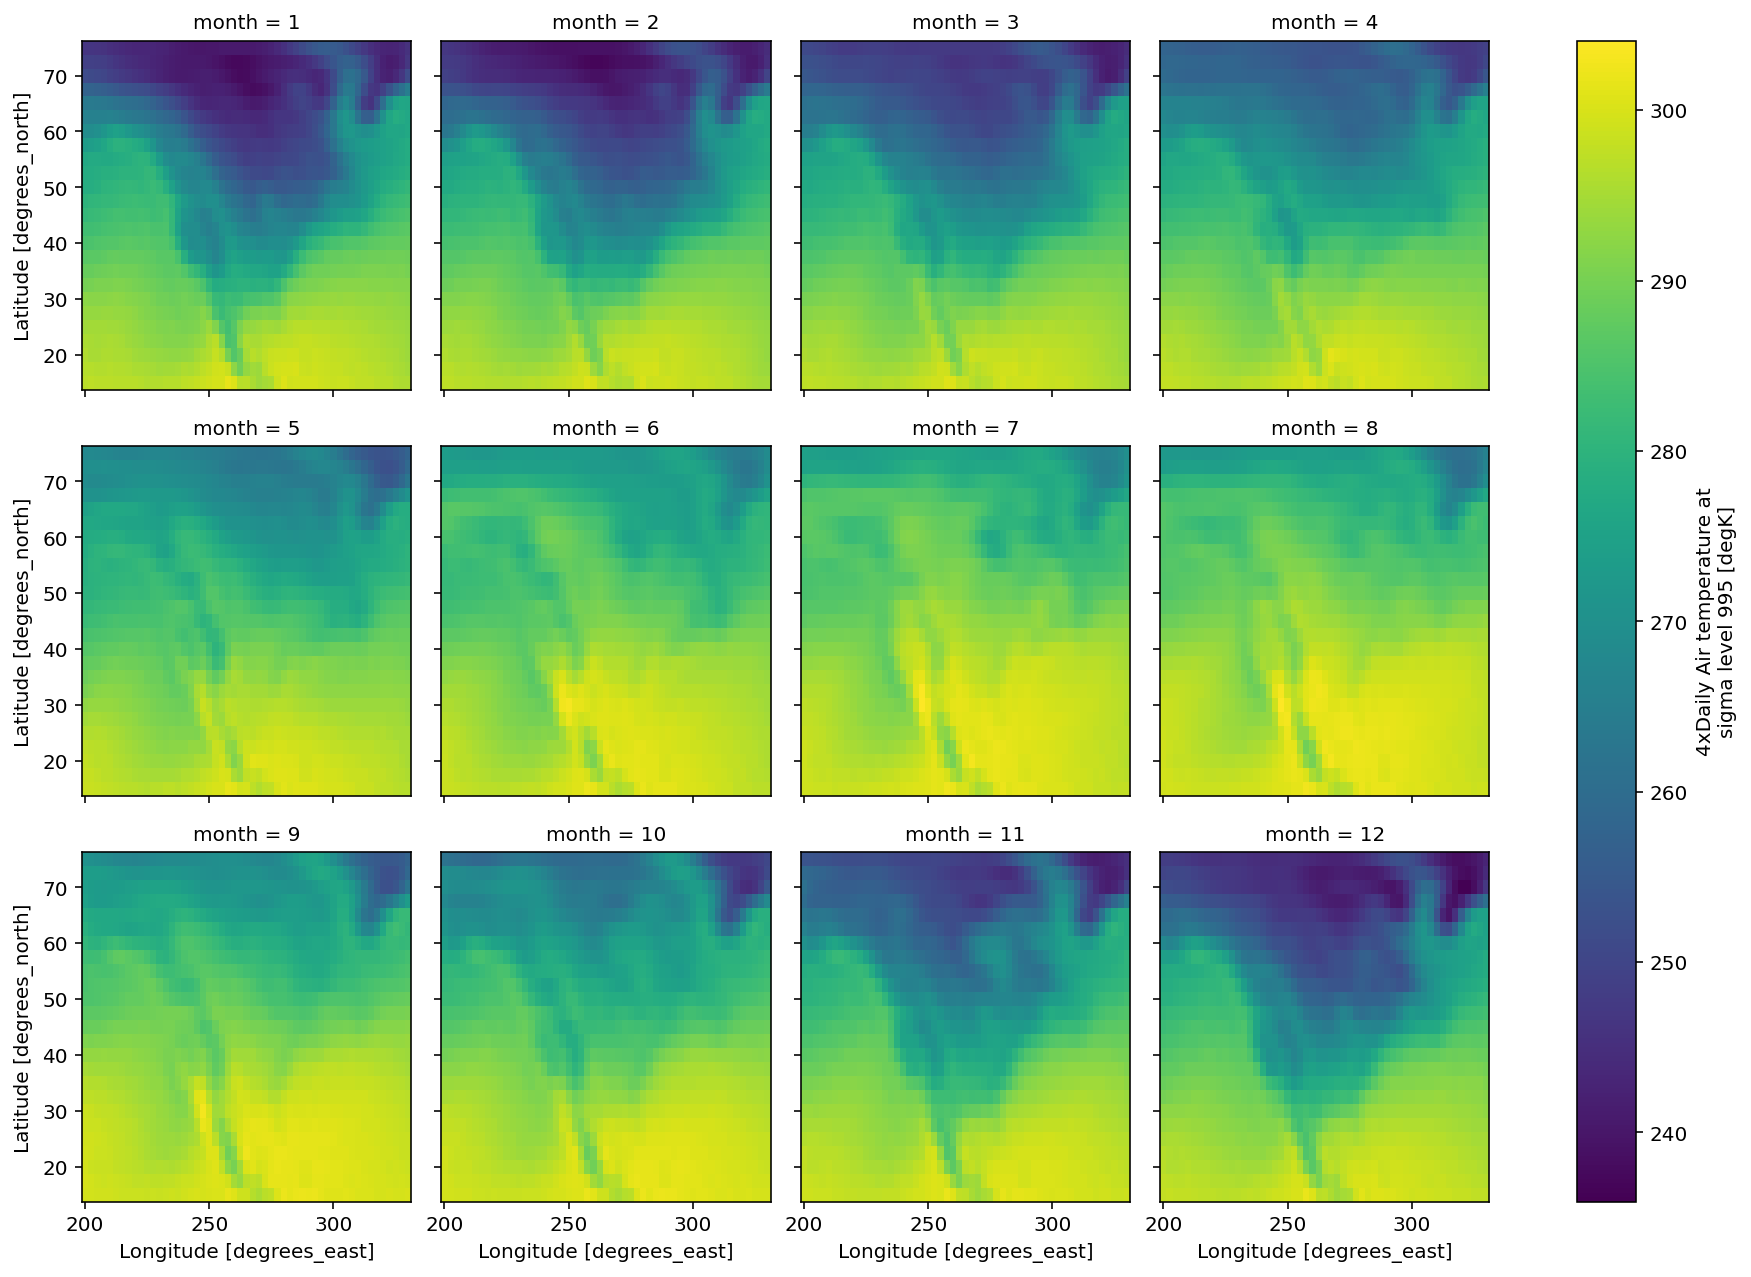

In [32]:
(
    da.groupby("time.month")
    .reduce(np.mean)
    .plot(col="month", col_wrap=4)
)

**tip** `map` is for functions that expect and return xarray objects (see also ``Dataset.map``). `reduce` is for functions that expect and return plain arrays (like numpy or scipy functions)

### GroupBy does not provide construct

All the groups need not be the same "length" (e.g. months can have 28, 29, 30, or 31 days)

### Instead looping over groupby objects is possible

Maybe you want to plot data in each group separately?

In [ ]:
for label, group in da.groupby("time.month"):
    print(label)

This is a DataArray contain data for all December days

In [ ]:
group

Maybe you want a histogram of December temperatures?

In [ ]:
group.plot.hist()

### In most cases, avoid a for loop using ``map``

Apply functions that expect xarray Datasets or DataArrays.

Avoid having to manually combine results using concat

In [ ]:
def iqr(da, dim):
    """ Calculates interquartile range """
    return (da.quantile(q=0.75, dim=dim) - da.quantile(q=0.25, dim=dim)).rename("iqr")


da.groupby("time.month").map(iqr, dim="time")

---

## Summary

Xarray provides methods for high-level analysis patterns:
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `groupby_bins`: GroupBy after discretizing a numeric variable.
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `weighted` :
   [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


## More resources

1. More tutorials here:https://xarray-contrib.github.io/xarray-tutorial/
1. Answers to common questions on "how to do X" are here: https://xarray.pydata.org/en/stable/howdoi.html